<a href="https://colab.research.google.com/github/PaulinaAragon/ESTADISTICA/blob/main/eii_u2_p_22150580.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCCIÓN**

En el presente trabajo se realiza una regresión lineal múltiple utilizando un conjunto de datos relacionados con el presupuesto de marketing en diferentes medios como en platafromas como youtube, facebook y medios de comunicación como el periódico, con el objetivo de analizar cómo influyen estas inversiones en las ventas.

**HIPÓTESIS**

Hipótesis nula (H₀): No existe relación significativa entre el gasto en publicidad (Facebook, Youtube y Newspaper) y las ventas.

Hipótesis alternativa (H₁): Existe una relación significativa entre al menos uno de los gastos en publicidad (Facebook, Youtube o Newspaper) y las ventas.

**MARCO TEÓRICO**

La regresión lineal múltiple es un método estadístico que permite estudiar el efecto simultáneo de varias variables independientes sobre una variable dependiente. Su fórmula general es:
Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

Donde:

Y es la variable dependiente ventas (sales)

X₁, X₂, Xₙ son las variables independientes facebook, youtube, peroidico(publicidad en distintos medios)

β₀ es la ordenada al origen

β₁, β₂, βₙ son los coeficientes de regresión

ε es el error aleatorio

Este modelo ayuda a determinar qué medios publicitarios son más efectivos en el incremento de ventas.

**METODOLOGÍA**

1. Recolección de datos: Los datos fueron obtenidos de una base de datos donde cada registro representa una campaña publicitaria, detallando las inversiones realizadas en YouTube, Facebook y medios de comuniación como periódico, junto con el resultado en ventas.
2. Limpieza y procesamiento de los datos.
Los datos fueron cargados y revisados para asegurar su integridad. Se validó que no existieran valores nulos ni atípicos evidentes que pudieran afectar los resultados del análisis.
3. Anális estadístico: Se aplicó una regresión lineal múltiple con el fin de evaluar la relación entre las inversiones publicitarias y las ventas. La variable dependiente fue sales (ventas), mientras que las variables independientes fueron youtube, facebook y newspaper(periódico). Este modelo estadístico permitió analizar la influencia de cada medio publicitario sobre las ventas y determinar cuáles tienen mayor impacto en el comportamiento de compra.
4. Interpretación de resultados: Los coeficientes obtenidos a partir del modelo de regresión fueron interpretados para establecer conclusiones sobre la efectividad de cada canal de publicidad. Se brindaron recomendaciones sobre cómo redistribuir el presupuesto de marketing de manera más eficiente para maximizar los ingresos.


**RESULTADOS**

El modelo tiene un R-cuadrado ajustado de aproximadamente 0.89, lo que indica que el 89% de la variabilidad en las ventas se puede explicar por las variables de marketing.

El valor p de Newspaper es mayor a 0.05, lo que sugiere que no tiene un impacto significativo en las ventas.

La mejor opción segun los resultados de histogramas es youtube o facebook.

**CONCLUSIÓN**

Los resultados obtenidos indican que la inversión en plataformas digitales (facbeook, youtube) tiene un impacto positivo y significativo en las ventas, mientras que la inversión en periódicos no muestra un efecto relevante. Por lo tanto, las empresas deberían considerar una redistribución del presupuesto de marketing para optimizar su impacto en las ventas.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/PaulinaAragon/ESTADISTICA/refs/heads/main/Marketing_Data.csv')
df.dropna(inplace = True)
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


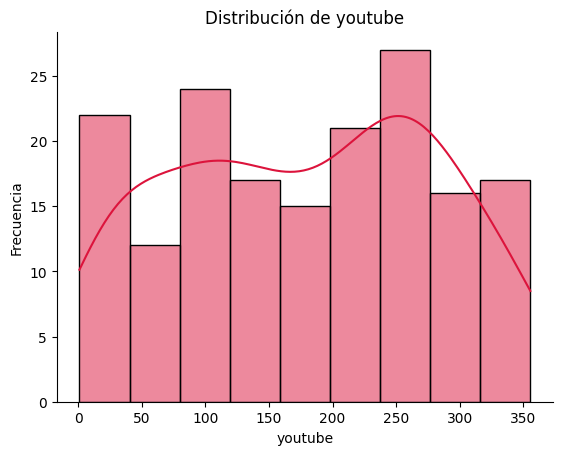

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['youtube'], kde = True, color = 'crimson')

plt.xlabel('youtube')
plt.ylabel('Frecuencia')
plt.title('Distribución de youtube')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

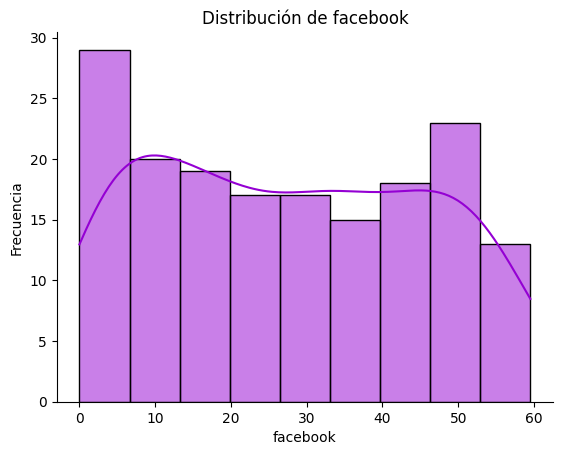

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['facebook'], kde = True, color = 'darkviolet')

plt.xlabel('facebook')
plt.ylabel('Frecuencia')
plt.title('Distribución de facebook')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

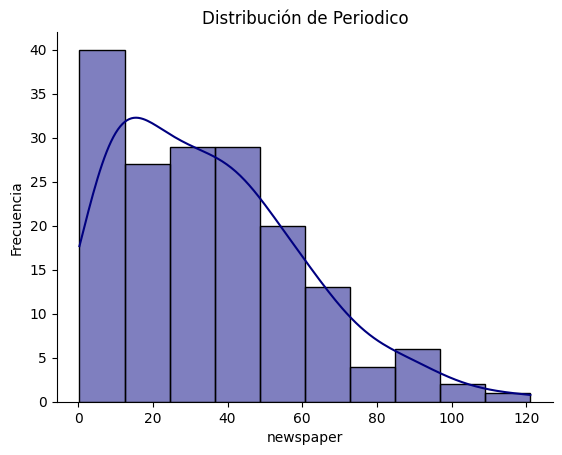

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['newspaper'], kde = True, color = 'navy')

plt.xlabel('newspaper')
plt.ylabel('Frecuencia')
plt.title('Distribución de Periodico')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

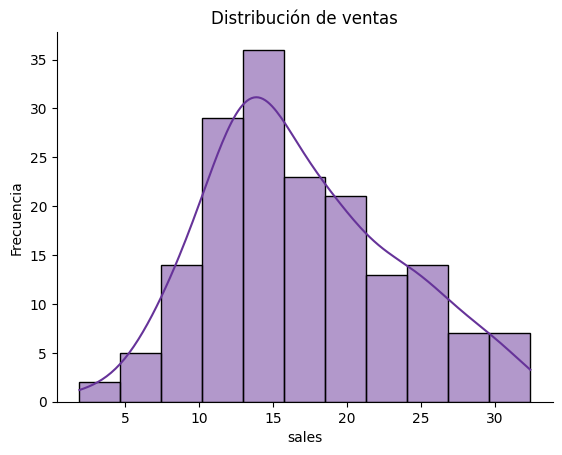

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['sales'], kde = True, color = 'rebeccapurple')

plt.xlabel('sales')
plt.ylabel('Frecuencia')
plt.title('Distribución de ventas')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# no existen datos atipicos

Text(0.5, 1.0, 'Matriz de Correlación')

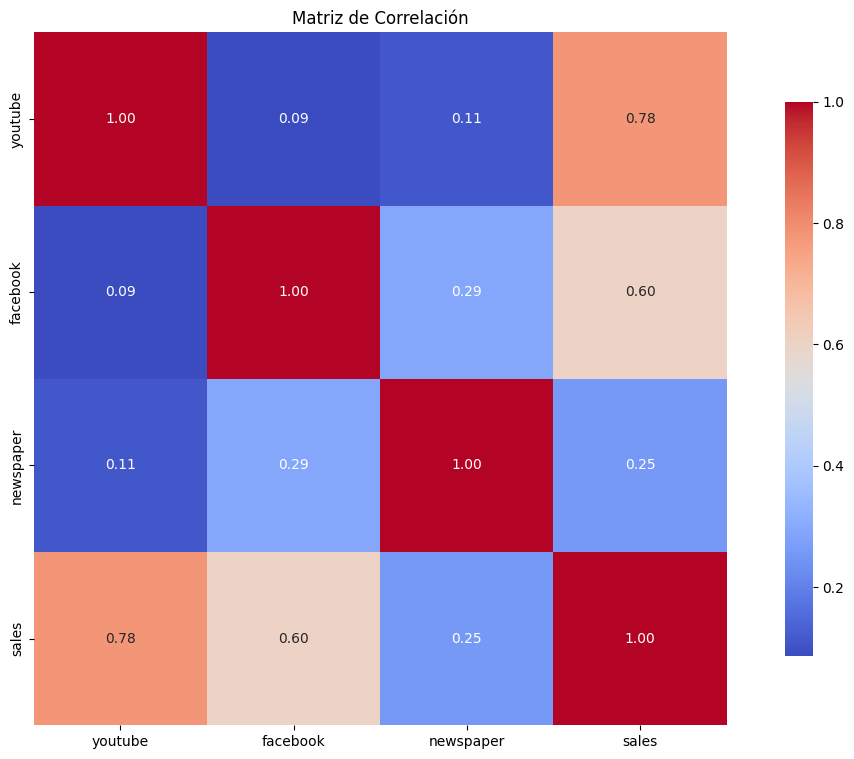

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f", square = True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')

Coeficiente de correlacion:  0.8729



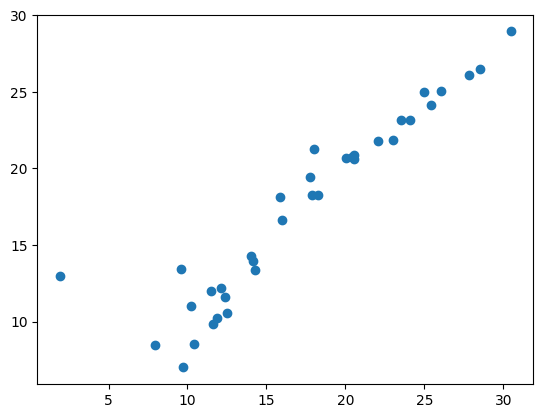

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['youtube',	'facebook',	'newspaper']]
Y = df["sales"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de correlacion: {r2: 0.4f}\n')

In [8]:
from statsmodels.formula.api import ols

modelo_2 = ols( formula= "sales ~ youtube + facebook + newspaper ", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2) #ANOVA de una via
tabla_anova

,sum_sq,df,F,PR(>F)
youtube,3594.671630,1.0,889.821458,8.307874e-69
facebook,1763.824226,1.0,436.615303,1.830754e-48
newspaper,1.750370,1.0,0.433285,5.112879e-01
Residual,674.641139,167.0,NaN,NaN


In [9]:
b0, b1, b2, b3, = modelo_2.params
Fun = lambda X1, X2, X3,: b0 + b1 * X1 +  b2 * X2 + b3 * X3
Fun(200,30,100)

18.632843825203697

In [10]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/PaulinaAragon/ESTADISTICA/refs/heads/main/Marketing_Data.csv')
df.dropna(inplace = True)
df

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


## **PARTE 2. TAREA EXTRA**

In [13]:
promedio = df['sales'].mean()
df['mayor_al_promedio'] = (df['sales'] > promedio).astype(int)
df

,youtube,facebook,newspaper,sales,mayor_al_promedio
0,84.72,19.20,48.96,12.60,0
1,351.48,33.96,51.84,25.68,1
2,135.48,20.88,46.32,14.28,0
3,116.64,1.80,36.00,11.52,0
4,318.72,24.00,0.36,20.88,1
...,...,...,...,...,...
166,45.84,4.44,16.56,9.12,0
167,113.04,5.88,9.72,11.64,0
168,212.40,11.16,7.68,15.36,0
169,340.32,50.40,79.44,30.60,1
